In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
paths = pd.read_pickle('/home/nyman/model-comparison/20200611_dfci_full_rcc_paths_df_fuhrman2_vs_fuhrman4_cc_only_prob_tumor_geq70_subset.pkl')

In [4]:
paths

,full_path,x,y,UNIQUE_SAMPLE_ID,image_name,Comment,UNIQUE_SAMPLE_ID_in_clinical_data,UNIQUE_SAMPLE_ID_in_mutations,Reason not in mutations,Reason not in clincal data,...,PBRM1,KDM5C,prob_tumor,is_cc,pre_first_line_treatment_biopsy,biopsy_rel_tx,biopsy_rel_chosen_regimen,ici_treated,vegf_treated,fuhrman4
file_id,,,,,,,,,,,,,,,,,,,,,
2013-10-08__3230,/mnt/disks/image_data/2013-10-08__3230_files/2...,52,40,1076740,2013-10-08__3230.svs,NaN,1076740.0,1076740.0,NaN,NaN,...,NaN,NaN,0.959897,True,NaN,not_annotated,NaN,False,False,True
2013-10-08__3230,/mnt/disks/image_data/2013-10-08__3230_files/2...,66,28,1076740,2013-10-08__3230.svs,NaN,1076740.0,1076740.0,NaN,NaN,...,NaN,NaN,0.941134,True,NaN,not_annotated,NaN,False,False,True
2013-10-08__3230,/mnt/disks/image_data/2013-10-08__3230_files/2...,6,25,1076740,2013-10-08__3230.svs,NaN,1076740.0,1076740.0,NaN,NaN,...,NaN,NaN,0.776510,True,NaN,not_annotated,NaN,False,False,True
2013-10-08__3230,/mnt/disks/image_data/2013-10-08__3230_files/2...,57,26,1076740,2013-10-08__3230.svs,NaN,1076740.0,1076740.0,NaN,NaN,...,NaN,NaN,0.751110,True,NaN,not_annotated,NaN,False,False,True
2013-10-08__3230,/mnt/disks/image_data/2013-10-08__3230_files/2...,57,43,1076740,2013-10-08__3230.svs,NaN,1076740.0,1076740.0,NaN,NaN,...,NaN,NaN,0.906529,True,NaN,not_annotated,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-01__26327,/mnt/disks/image_data/2018-03-01__26327_files/...,73,40,1097026,2018-03-01__26327.svs,NaN,1097026.0,1097026.0,NaN,NaN,...,0.0,0.0,0.995730,True,True,pre_first_line_treatment,pre_chosen_regimen,True,False,True
2018-03-01__26327,/mnt/disks/image_data/2018-03-01__26327_files/...,63,16,1097026,2018-03-01__26327.svs,NaN,1097026.0,1097026.0,NaN,NaN,...,0.0,0.0,0.981938,True,True,pre_first_line_treatment,pre_chosen_regimen,True,False,True
2018-03-01__26327,/mnt/disks/image_data/2018-03-01__26327_files/...,53,50,1097026,2018-03-01__26327.svs,NaN,1097026.0,1097026.0,NaN,NaN,...,0.0,0.0,0.930961,True,True,pre_first_line_treatment,pre_chosen_regimen,True,False,True


In [5]:
updated_paths = pd.read_csv('/home/nyman/20200610_all_profile_rcc_tiles_paths_df_with_prob_tumor_full.csv')

In [7]:
updated_paths.shape

(1303173, 6)

5       2014-01-16__4512
481    2017-10-05__23762
386    2016-11-21__17312
340     2014-08-18__6557
216    2016-02-04__12796
dtype: object

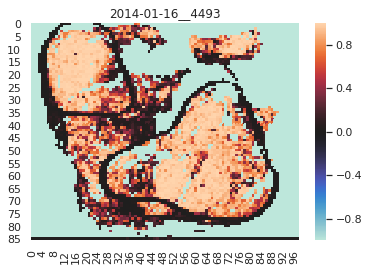

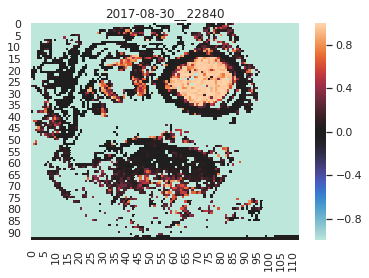

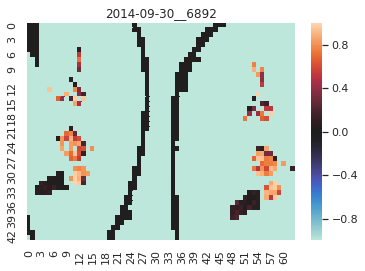

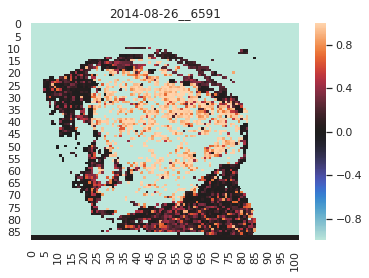

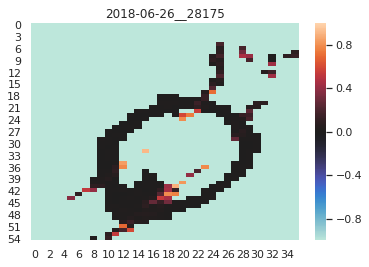

In [32]:
for slide_id in pd.Series(updated_paths.slide_id.unique()).sample(5).values:
    
    temp_df = updated_paths.set_index('slide_id').loc[slide_id]
    temp_store = np.zeros((temp_df.y.max()+1, temp_df.x.max()+1)) - 1

    for idx, row in temp_df.iterrows():
        temp_store[row.y, row.x] = row.prob_tumor
    sns.heatmap(temp_store, vmin=-1, vmax=1, center=0)
    plt.title(slide_id)
    plt.show()

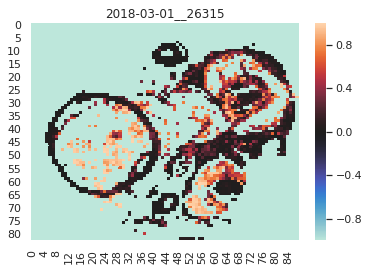

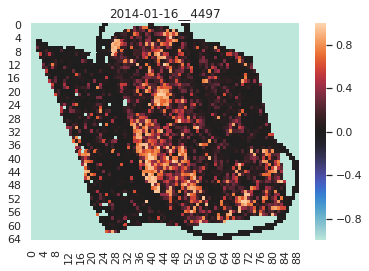

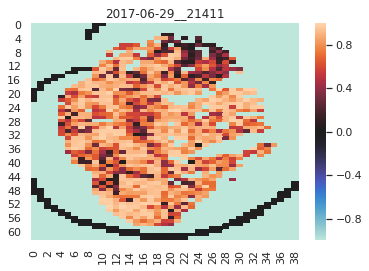

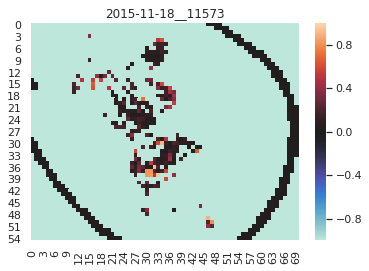

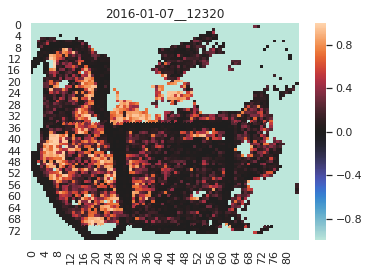

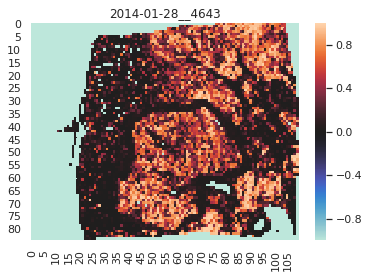

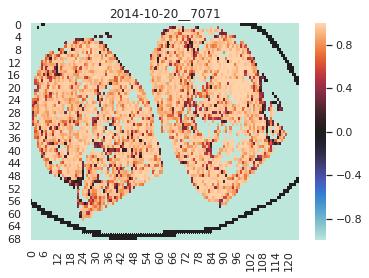

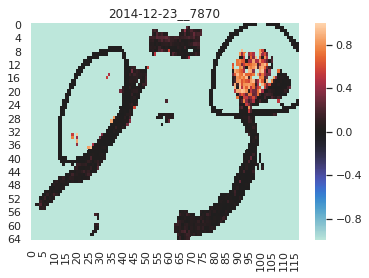

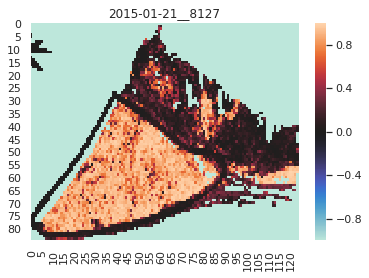

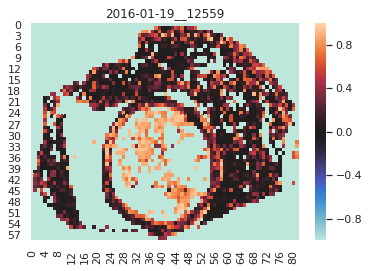

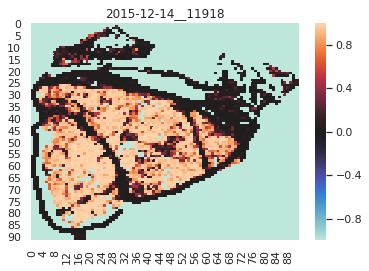

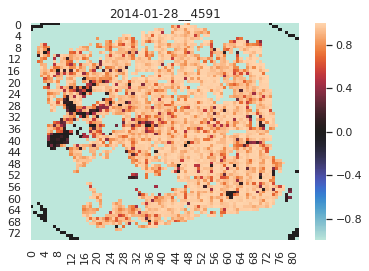

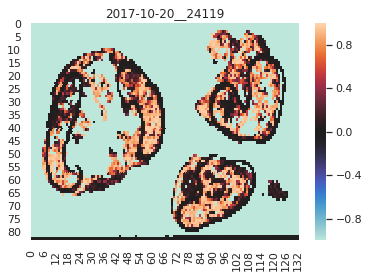

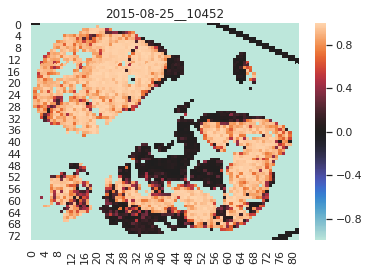

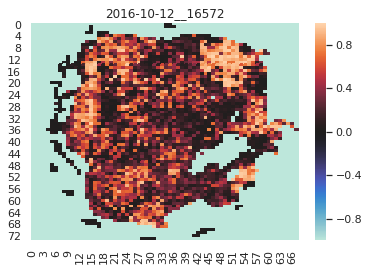

In [33]:
for slide_id in pd.Series(updated_paths.slide_id.unique()).sample(15).values:
    
    temp_df = updated_paths.set_index('slide_id').loc[slide_id]
    temp_store = np.zeros((temp_df.y.max()+1, temp_df.x.max()+1)) - 1

    for idx, row in temp_df.iterrows():
        temp_store[row.y, row.x] = row.prob_tumor
    sns.heatmap(temp_store, vmin=-1, vmax=1, center=0)
    plt.title(slide_id)
    plt.show()

In [20]:
temp_store.shape

(40,)

In [18]:
row.y

25

In [12]:
temp_df.x.max()

28

In [19]:
row.prob_tumor

0.003259338904172182

In [40]:
chosen_checkpoint = '/home/nyman/model-comparison/tumor_vs_nontumor_expts/20200610/expt1_baseline_models_with_cj_lr_titration/2020-06-10_19-10-36-121614/checkpoint'
chosen_statedict = 'statedict_fold1_model1_002'

In [37]:
import os
from glob import glob

glob(chosen_checkpoint+'/*all*')

['/home/nyman/model-comparison/tumor_vs_nontumor_expts/20200610/expt1_baseline_models_with_cj_lr_titration/2020-06-10_19-10-36-121614/checkpoint/tile_stats_all_models.csv',
 '/home/nyman/model-comparison/tumor_vs_nontumor_expts/20200610/expt1_baseline_models_with_cj_lr_titration/2020-06-10_19-10-36-121614/checkpoint/auc_stats_all_models.csv',
 '/home/nyman/model-comparison/tumor_vs_nontumor_expts/20200610/expt1_baseline_models_with_cj_lr_titration/2020-06-10_19-10-36-121614/checkpoint/training_log_all_models.csv']

In [38]:
auc_stats = pd.read_csv('/home/nyman/model-comparison/tumor_vs_nontumor_expts/20200610/expt1_baseline_models_with_cj_lr_titration/2020-06-10_19-10-36-121614/checkpoint/auc_stats_all_models.csv')

In [43]:
auc_stats.groupby(['epoch','model_idx']).mean().sort_values(by='tile_auc')

fold_idx  tile_auc
epoch model_idx                    
0     1               1.5  0.858143
4     0               1.5  0.864482
3     2               1.5  0.865613
      0               1.5  0.865687
1     1               1.5  0.866741
2     0               1.5  0.869130
0     2               1.5  0.869939
      0               1.5  0.870491
3     1               1.5  0.870967
4     1               1.5  0.872665
1     0               1.5  0.873992
2     2               1.5  0.874497
4     2               1.5  0.877220
1     2               1.5  0.877232
2     1               1.5  0.882389

(0, 1)

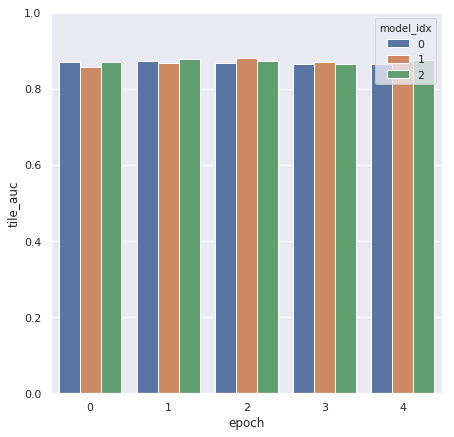

In [58]:
import seaborn as sns
sns.set(rc={'figure.figsize':[7,7]})

sns.categorical.barplot(x='epoch',hue='model_idx', y='tile_auc', data=auc_stats.groupby(['epoch','model_idx']).mean().reset_index())
plt.ylim(0,1)

- Model0: resnet18 
- Model1: resnet50
- Model2: spatial attention with resnet50 encoder